目的
----
spatial mappingを試す

内容
----
* 参考
    - http://sinhrks.hatenablog.com/entry/2015/07/18/215951
    - http://geopandas.org/gallery/plotting_with_geoplot.html

メモ
----
* To run these codes, you must install `geopandas`, `geoplot`, `descartes`, `cartopy`, `pysal` via pip
    - To install `cartopy`, you must install dependencies of it listed on https://scitools.org.uk/cartopy/docs/latest/installing.html#installing. (If not, install process fails.) (packages to be installed via homebrew are included.)
    
`geopandas`について
* geoplot以外のパッケージを用いたプロットも公式ドキュメント(http://geopandas.org/gallery/cartopy_convert.html)で紹介されている
* GeoDataFrameの構造
>    - by default when you use the read_file command, the column containing spatial objects from the file is named “geometry” by default, and will be set as the active geometry column. 

`geoplot`について
* geopandasと併用できるようにデザインされているそう
* plotの種類
    - polyplot : 白黒の輪郭線でのプロット
        - projectionを変えることで球(地球儀)へプロットできるようだが、なぜかpythonが異常終了してしまいできなかった
    - choropleth : polyplotが色塗りされたプロット

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import geopandas as gpd
import geoplot

%matplotlib inline

## load map data

In [2]:
# -- load map-information of tokyo (in geojson format)
df = gpd.read_file('data/land/tokyo.geojson')

display(df.info())
display(df.head())

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 6 columns):
ward_ja     63 non-null object
ward_en     62 non-null object
area_ja     63 non-null object
area_en     62 non-null object
code        62 non-null float64
geometry    63 non-null object
dtypes: float64(1), object(5)
memory usage: 3.0+ KB


None

,ward_ja,ward_en,area_ja,area_en,code,geometry
0,足立区,Adachi Ku,都区部,Tokubu,131211.0,"POLYGON ((139.821051 35.815077, 139.821684 35...."
1,文京区,Bunkyo Ku,都区部,Tokubu,131059.0,"POLYGON ((139.760933 35.732206, 139.761002 35...."
2,千代田区,Chiyoda Ku,都区部,Tokubu,131016.0,"POLYGON ((139.770135 35.705352, 139.770172 35...."
3,台東区,Taito Ku,都区部,Tokubu,131067.0,"POLYGON ((139.809714 35.728135, 139.809705 35...."
4,品川区,Shinagawa Ku,都区部,Tokubu,131091.0,"(POLYGON ((139.719199 35.641847, 139.719346 35..."


## plot

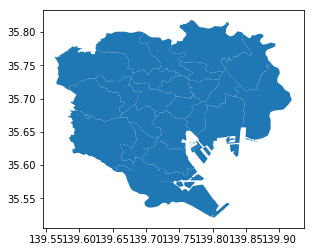

In [3]:
# -- plot map of tokyo (except islands)
df = df[df['area_en'] == 'Tokubu']

# -- plot by geopandas
df.plot()

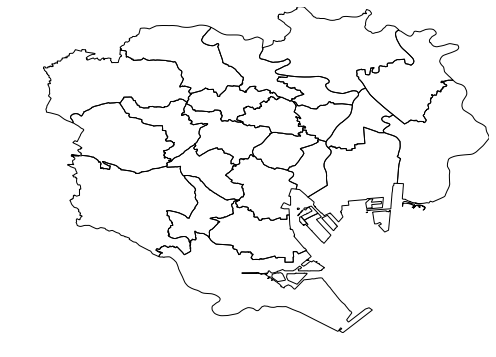

In [4]:
# -- polyplot by geoplot
geoplot.polyplot(df)

In [5]:
"""
[WARNING : If you run below code, python stops suddenly.]
(The code is written on official document. Why?)
"""

# import geopandas

# path = geopandas.datasets.get_path('naturalearth_lowres')
# df = geopandas.read_file(path)
# # Add a column we'll use later
# df['gdp_pp'] = df['gdp_md_est'] / df['pop_est']

# boroughs = geopandas.read_file(geopandas.datasets.get_path('nybb')).to_crs(epsg='4326')
# injurious_collisions = geopandas.read_file(
#     "https://github.com/ResidentMario/geoplot-data/raw/master/nyc-injurious-collisions.geojson")

# import geoplot
# import geoplot.crs as gcrs
# ax = geoplot.polyplot(df, projection=gcrs.Orthographic(), figsize=(8, 4))
# ax.set_global()
# ax.outline_patch.set_visible(True)

'\n[WARNING : If you run below code, python stops suddenly.]\n(The code is written on official document. Why?)\n'

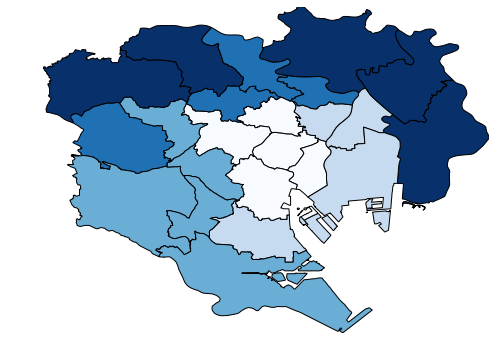

In [10]:
geoplot.choropleth(df, hue='code', cmap='Blues')
# -- this is seaborn-like style, that is not surprising because geoplot requires seaborn.